## Introduction:

The dataset I chose was 'Kontinental Hockey League player statistics'.

It contains information about KHL **810 hockey players** - an international professional ice hockey league. I found this data set on Kaggle website in Data section. There are only 1 CSV files in the current version of the dataset.

#### The questions I wanted to answer using this dataset:
* What's the distribution of player's penalty time in 2018-2019 season?
* What's the percentage of players in Forward and Defence positions?
* What was the distribution of penalty time (low, mid, high) across all players?
* Of the 2 positions, which position scored the most goals?
* Who had the most assists in the League?
* What was the TOP 5 players who scored the most goals?
* Who had the highest average time spent on the ice per game?
* Which of my 3 favorite KHL teams was the most powerful in a particular season?
* Which of the players in Dynamo Riga had the most goals?
* Which of the 'DR' player had the biggest time on ice per game?
* Which were the most aggressive players on team (has the most penalty time)?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
khl = pd.read_csv('khl_2018-2019.csv')
khl.head(5)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
0,0,Аалтонен Миро,ВИТ,61,19,23,42,9,165,11.5,20,17:39,F
1,1,Аверин Егор,ЛОК,57,13,14,27,15,102,12.7,10,16:18,F
2,2,Авцин Александр,НХК,20,1,2,3,1,24,4.2,8,11:18,F
3,3,Азеведо Джастин,АКБ,62,13,24,37,26,195,6.7,42,16:49,F
4,4,Акмальдинов Александр,СОЧ,30,1,6,7,-3,24,4.2,11,08:30,F


In [3]:
# check the rows and columns of this dataset
khl.shape

(811, 13)

###### Whats the distribution of player's penalty time in 2018-2019 season?

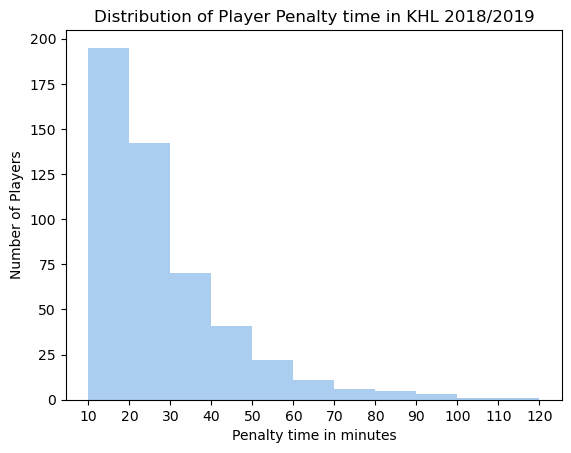

In [265]:
bins = [10,20,30,40,50,60,70,80,90,100,110,120]

plt.hist(khl.penalty_time, bins=bins, color='#abcdef')

plt.ylabel('Number of Players')
plt.xlabel('Penalty time in minutes')
plt.title('Distribution of Player Penalty time in KHL 2018/2019')
plt.xticks(bins)

plt.show()

A histogram above shows that in 2018-2019 season most of the KHL players penalty time did not exceed **30** minutes.

###### What's the percentage of players in Forward and Defence positions?
(dateset didn't contain info about goaltenders, so wee exclude them this time)

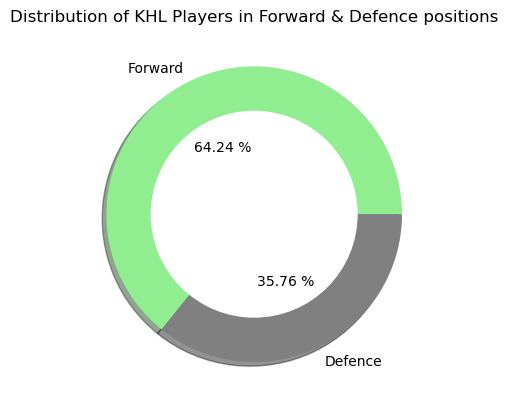

In [271]:
# Count players in each of the position.
forward = khl.loc[khl['position'] == 'F'].count()[0]
defence = khl.loc[khl['position'] == 'D'].count()[0]

labels = ['Forward', 'Defence']
colors = ['lightgreen', 'grey']

plt.pie([forward, defence], labels = labels, colors=colors, shadow=True, autopct='%.2f %%', pctdistance=0.5)

# Draw a white circle inside the PieChart to make it look like a donat.
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title('Distribution of KHL Players in Forward & Defence positions')
plt.show()

There were almost 2 Forward players **(64,24%)** for every Defence player **(35,76%).**

###### What was the distribution of penalty time (low, mid, high) across all players? 

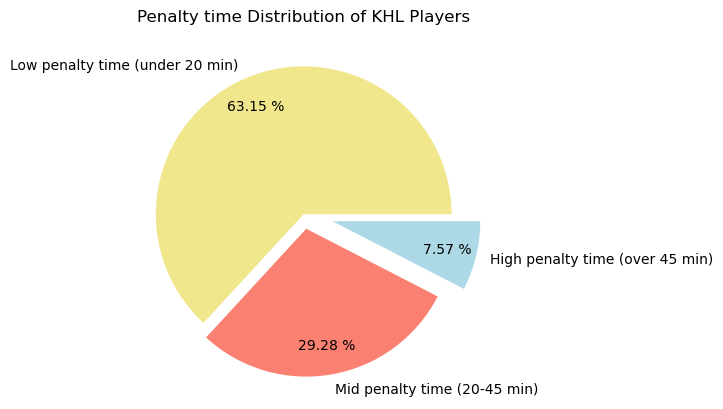

In [270]:
low = khl.loc[khl.penalty_time < 20].count()[0]
mid = khl.loc[(khl.penalty_time >= 20) & (khl.penalty_time < 45)].count()[0]
high = khl.loc[(khl.penalty_time >= 45) & (khl.penalty_time > 45)].count()[0]

penalty = [low, mid, high]
explode = [0,.1,.2]
colors = ['khaki', 'salmon', 'lightblue']
labels = ['Low penalty time (under 20 min)', 'Mid penalty time (20-45 min)', 'High penalty time (over 45 min)']

plt.title('Penalty time Distribution of KHL Players')

plt.pie(penalty, labels=labels, colors=colors, autopct='%.2f %%', pctdistance=0.8, explode=explode)
plt.show()

Almost 2/3 **(63,15%)** of all players had low penaly time, while almost a third **(29,28%)** of players had mid penalty time and only a fraction of all players **(7,57%)** managed to earned high penalty time.

###### Of the 2 positions, which position scored the most goals?

In [35]:
# Let's group players by positions and see how much goals was scored by each of position.
khl.groupby('position').goals.describe()

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
D,290.0,2.258621,2.823286,0.0,0.0,1.0,3.0,16.0
F,521.0,6.001919,6.153954,0.0,1.0,4.0,9.0,29.0


From the table above we see that most goals was scored by players in Forward position **(521)** while players in Defence position scored almost half of the goals **(290)**.

###### Who had the most assists in the League?

In [272]:
khl.sort_values(by='assists', ascending=False).head(2)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
107,107,Гусев Никита,СКА,62,17,64,81,39,194,8.8,10,15:52,F
494,494,Шипачёв Вадим,ДИН,61,20,48,67,22,112,17.9,30,20:56,F


**Nikita Gusev** from 'SKA' had the most assists in the 2019-2019 season.

###### What was the TOP 5 players with the most goals?

In [55]:
khl.sort_values(by='goals', ascending=False).head(5)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
169,169,Капризов Кирилл,ЦСК,57,29,20,49,34,160,18.1,16,17:15,F
123,123,Доус Найджел,АВТ,60,28,41,69,18,193,14.5,12,18:09,F
388,388,Секстон Дэн,АВТ,61,25,27,52,22,186,13.4,6,16:28,F
160,160,Кагарлицкий Дмитрий,ДИН,61,24,37,59,21,188,12.8,40,19:41,F
67,67,Виделль Линус,ДРГ,49,24,24,48,7,151,15.9,14,18:24,F


The most goals in the season had Kirill Kaprizov (Кирилл Капризов) **(57)**, followed by Nigel Dawes (Найджел Доус) **(28)**, Dan Sexton (Дэн Секстон) **(25)**, Dmitri Kagarlitsky (Дмитрий Кагарлицкий) **(24)** and Linus Videll (Линус Виделль) **(24).**

###### Who had the highest average time spent on the ice per game?

In [276]:
khl.sort_values(by='avr_time_on_ice', ascending=False).head(1)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
601,601,Диц Даррен,БАР,62,16,37,53,30,253,6.3,59,23:45,D


The highest average time spent on ice per game was **23** minutes and **45** secods, achieved by Darren Dietz (Диц Даррен) from 'Barys Hockey Club'.

###### Which of my 3 favorite KHL teams was the most powerful in a particular season?
Compare 3 different teams by how much points their players have earned over the course of particular season.

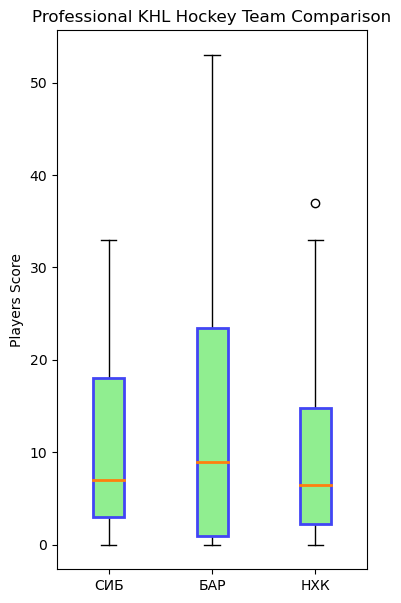

In [261]:
plt.figure(figsize=(4,7))

sibir = khl.loc[khl.team == 'СИБ']['points']
ak_bars = khl.loc[khl.team == 'БАР']['points']
neftihimik = khl.loc[khl.team == 'НХК']['points']

labels = ['СИБ', 'БАР', 'НХК']

boxes = plt.boxplot([sibir, ak_bars, neftihimik], labels=labels, patch_artist=True, medianprops={'linewidth':2})

for box in boxes['boxes']:
    # set edge color
    box.set(color='#4245f5', linewidth=2)
    # change fill color
    box.set(facecolor='lightgreen')
    
plt.title('Professional KHL Hockey Team Comparison')
plt.ylabel('Players Score')

plt.show()

I made a comparison between 3 teams: **HC Sibir Novosibirsk,** **HC Ak Bars**, and **HC Neftekhimik Nizhnekamsk**. They are compared by points earned by they players. What we can see in the 'Boxplot' above is that **HC Neftekhimik Nizhnekamsk** (НХК) is the weakest team in this trio, on the other hand **HC Ak Bars** (БАР) players had earned the most points, making it the most powerful team in this comparison (on paper).

Alright. So, given the fact that I'm from **Latvia,** it's time to take a look of team from my home country - 'Dynamo Riga'. Keep in mind that since the dataset is written in russian, abbreviation of Dynamo Riga is 'ДРГ'.

##### Which of the players in Dynamo Riga had the most goals?

In [6]:
dynamo = khl[khl.team == 'ДРГ']
dynamo.sort_values(by='goals', ascending=False).head(4)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
67,67,Виделль Линус,ДРГ,49,24,24,48,7,151,15.9,14,18:24,F
110,110,Дарзиньш Лаурис,ДРГ,62,18,26,44,2,147,12.2,32,18:29,F
681,681,Майоне Мэтью,ДРГ,58,12,31,43,-13,149,8.1,22,19:46,D
119,119,Джериньш Андрис,ДРГ,62,10,12,22,-10,88,11.4,40,14:25,F


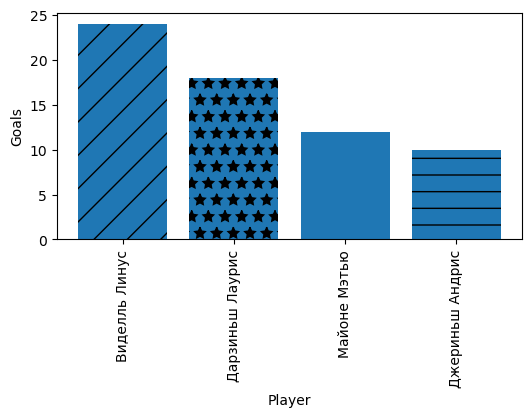

In [9]:
dynamo = khl[khl.team == 'ДРГ']
the_most_goals = dynamo.sort_values(by='goals', ascending=False).head(4)
goals = the_most_goals['goals']
player = the_most_goals['player']

plt.figure(figsize=(6,3), dpi=100)
bars = plt.bar(player, goals)

plt.ylabel('Goals')
plt.xlabel('Player')
plt.xticks(rotation=90)

patterns = ['/', '*', '^', '-']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

In 2018-2019 season Linus Videll (Виделль Линус) managed to score **24** goals, becoming the lead goal scorer in Dynamo Riga.

###### Which of the 'DR' player had the biggest time on ice per game?

In [23]:
dynamo.sort_values(by='avr_time_on_ice', ascending=False).head(3)

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
537,537,Балинскис Увис,ДРГ,37,1,10,11,-7,43,2.3,16,19:51,D
681,681,Майоне Мэтью,ДРГ,58,12,31,43,-13,149,8.1,22,19:46,D
766,766,Сотниекс Кристапс,ДРГ,55,3,7,10,-20,78,3.8,28,19:36,D


As it turns out one of the youngest player on team - Uvis Balinskis (Балинскис Увис), managed to scrape the most minutes on ice per game (on average **19** minutes and **51** sec.).

###### Which were the most aggressive players on team (has the most penalty time)?

In [22]:
the_most_penalty = dynamo.sort_values(by='penalty_time', ascending=False).head(5)
the_most_penalty

,Unnamed: 0,player,team,games,goals,assists,points,pl_min,shoots,per_shoots,penalty_time,avr_time_on_ice,position
261,261,Макмиллан Брэндон,ДРГ,47,7,12,19,-12,103,6.8,50,19:03,F
119,119,Джериньш Андрис,ДРГ,62,10,12,22,-10,88,11.4,40,14:25,F
369,369,Редлихс Микелис,ДРГ,57,7,16,23,-3,93,7.5,34,17:52,F
582,582,Гимаев Сергей,ДРГ,54,0,1,1,-8,36,0.0,34,16:08,D
271,271,Мейя Гинтс,ДРГ,51,5,5,10,-14,62,8.1,32,15:45,F


The most penalty time earned Brandon McMillan (Брэндон Макмиллан) **(50 min)**, followed by Andris Dzerins (Андрис Джериньш) **(40 min)** and Mikelis Redlihs (Микелис Редлихс) **(34 min)**.

## Conclusion

What we found out:

*    In 2018-2019 KHL season most of the players penalty time did not exceed 30 minutes.
    
*    There were almost 2 Forward players (64,24%) for every Defence player (35,76%).
    
*    Almost 2/3 (63,15%) of all players had low penaly time, while almost a third (29,28%) of players had mid penalty time and    only a fraction of all players (7,57%) managed to earned high penalty time.
    
*    Most goals was scored by players in Forward position (521) while players in Defence position scored almost half of the goals (290).
    
*    Nikita Gusev from 'SKA' had the most assists in the 2019-2019 season.
    
*    The most goals in the season had Kirill Kaprizov (Кирилл Капризов) (57), followed by Nigel Dawes (Найджел Доус) (28), Dan Sexton (Дэн Секстон) (25), Dmitri Kagarlitsky (Дмитрий Кагарлицкий) (24) and Linus Videll (Линус Виделль) (24).
    
*    The highest average time spent on ice per game was 23 minutes and 45 secods, achieved by Darren Dietz (Диц Даррен) from 'Barys Hockey Club'.
    
*        In 2018-2019 season Linus Videll (Виделль Линус) managed to score 24 goals, becoming the lead goal scorer in Dynamo Riga.
    
*    One of the youngest player on team - Uvis Balinskis (Балинскис Увис), managed to scrape the most minutes on ice per game (on average 19 minutes and 51 sec.).
    
*    The most penalty time earned Brandon McMillan (Брэндон Макмиллан) (50 min), followed by Andris Dzerins (Андрис Джериньш) (40 min) and Mikelis Redlihs (Микелис Редлихс) (34 min).